In [1]:
import json
import glob
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def plot_confusion_matrics(confusion_matrix):
    plt.figure(figsize=(3, 3))
    plt.title("No Finding", fontweight='bold', fontsize=14)
    sns.heatmap(confusion_matrix, cbar=False, annot=True, fmt="d", cmap="Greens", linewidths=.5, annot_kws={"fontsize":14})
    plt.xlabel('predicted label', fontweight='bold', fontsize=12)
    plt.ylabel('actual label', fontweight='bold', fontsize=12);
    plt.show()

In [4]:
from IPython.display import display


 ========================= FOLD: 1 =========================
NO Finding - Precision: 0.6596980255516841
NO Finding - Recall: 0.8407894736842105
NO Finding - F1-score: 0.7393159302914166 

Finding - Precision: 0.720473577822697
Finding - Recall: 0.48616523772408415
Finding - F1-score: 0.5805700988947062


,NO Finding - Precision,NO Finding - Recall,NO Finding - F1-Score,Finding - Precision,Finding - Recall,Finding - F1-Score
0,0.659698,0.840789,0.739316,0.720474,0.486165,0.58057


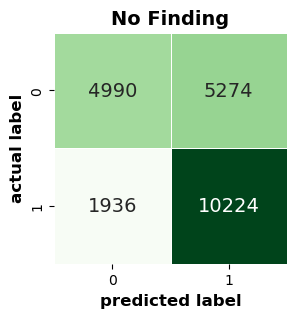


 ========================= FOLD: 2 =========================
NO Finding - Precision: 0.5369247235105244
NO Finding - Recall: 1.0
NO Finding - F1-score: 0.6987000928505107 

Finding - Precision: 0
Finding - Recall: 0.0
Finding - F1-score: 0.0


,NO Finding - Precision,NO Finding - Recall,NO Finding - F1-Score,Finding - Precision,Finding - Recall,Finding - F1-Score
0,0.536925,1.0,0.6987,0,0.0,0.0


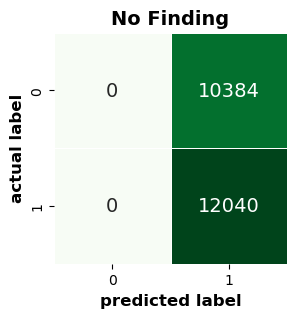


 ========================= FOLD: 3 =========================
NO Finding - Precision: 0.6449357520786092
NO Finding - Recall: 0.8450111413716267
NO Finding - F1-score: 0.7315400278641089 

Finding - Precision: 0.713194868662187
Finding - Recall: 0.45309013291937517
Finding - F1-score: 0.5541382379115989


,NO Finding - Precision,NO Finding - Recall,NO Finding - F1-Score,Finding - Precision,Finding - Recall,Finding - F1-Score
0,0.644936,0.845011,0.73154,0.713195,0.45309,0.554138


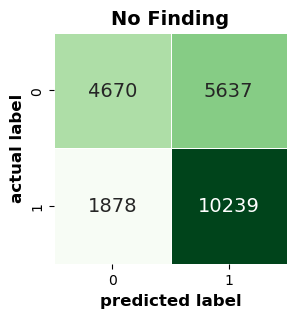


 ========================= FOLD: 4 =========================
NO Finding - Precision: 0.6527193904361535
NO Finding - Recall: 0.831896190874843
NO Finding - F1-score: 0.7314954543781516 

Finding - Precision: 0.7211111111111111
Finding - Recall: 0.49546712472564175
Finding - F1-score: 0.587363538661689


,NO Finding - Precision,NO Finding - Recall,NO Finding - F1-Score,Finding - Precision,Finding - Recall,Finding - F1-Score
0,0.652719,0.831896,0.731495,0.721111,0.495467,0.587364


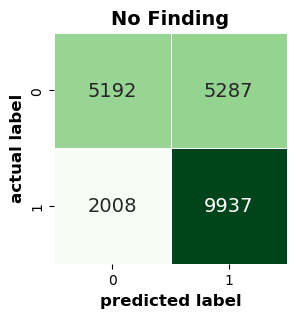


 ========================= FOLD: 5 =========================
NO Finding - Precision: 0.5395558330360328
NO Finding - Recall: 1.0
NO Finding - F1-score: 0.700924021666715 

Finding - Precision: 0
Finding - Recall: 0.0
Finding - F1-score: 0.0


,NO Finding - Precision,NO Finding - Recall,NO Finding - F1-Score,Finding - Precision,Finding - Recall,Finding - F1-Score
0,0.539556,1.0,0.700924,0,0.0,0.0


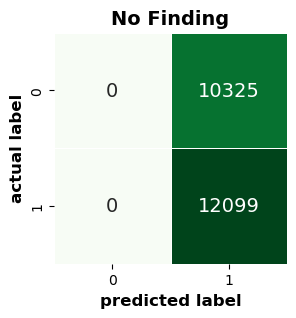

In [5]:
import os

CURRENT_PATH = os.path.abspath("")

FOLD = 5
for fold_num in range(1, FOLD + 1):
    evaluate_output_path = os.path.join(CURRENT_PATH, 
                                        "results", 
                                        "evaluate", 
                                        "binary_classification_with_cross_entropy_loss",
                                        "EfficientNetB0_None",
                                        f"FOLD_{fold_num}")

    best_f1_per_thresholds_path = os.path.join(evaluate_output_path,
                                               "best_thresholds.csv")

    best_fold_threshold = pd.read_csv(best_f1_per_thresholds_path)["thresholds"]

    with open(
        glob.glob(
            os.path.join(evaluate_output_path, 
                         "confusion_metrics", 
                         f"{best_fold_threshold.values[0]}*.json")
        )[0]
    ) as file:
        data = json.load(file)

    TN = int(data["No Finding"]["TN"])
    FP = int(data["No Finding"]["FP"])
    FN = int(data["No Finding"]["FN"])
    TP = int(data["No Finding"]["TP"])
    confusion_matrix = [
        [TN, FP],
        [FN, TP]
    ]
    
    print("\n", "====="*5, f"FOLD: {fold_num}", "====="*5)
    
    try: no_finding_precision = TP / (TP+FP) 
    except ZeroDivisionError: no_finding_precision = 0
    try: no_finding_recall = TP / (TP+FN) 
    except ZeroDivisionError: no_finding_recall = 0
    try: no_finding_f1_scores = 2*TP / (2*TP + FP + FN) 
    except ZeroDivisionError: no_finding_f1_scores = 0
    
    print("NO Finding - Precision:", no_finding_precision)
    print("NO Finding - Recall:", no_finding_recall)
    print("NO Finding - F1-score:", no_finding_f1_scores, "\n")
    
    try: finding_precision = TN / (TN+FN) 
    except ZeroDivisionError: finding_precision = 0
    try: finding_recall = TN / (TN+FP) 
    except ZeroDivisionError: finding_recall = 0
    try: finding_f1_scores = 2*TN / (2*TN + FN + FP) 
    except ZeroDivisionError: finding_f1_scores = 0
    
    print("Finding - Precision:", finding_precision)
    print("Finding - Recall:", finding_recall)
    print("Finding - F1-score:", finding_f1_scores)
    
    report_df_dict = {
        "NO Finding - Precision": [],
        "NO Finding - Recall": [],
        "NO Finding - F1-Score": [],
        
        "Finding - Precision": [],
        "Finding - Recall": [],
        "Finding - F1-Score": []
    }
    report_df_dict["NO Finding - Precision"].append(no_finding_precision)
    report_df_dict["NO Finding - Recall"].append(no_finding_recall)
    report_df_dict["NO Finding - F1-Score"].append(no_finding_f1_scores)
    report_df_dict["Finding - Precision"].append(finding_precision)
    report_df_dict["Finding - Recall"].append(finding_recall)
    report_df_dict["Finding - F1-Score"].append(finding_f1_scores)
    
    df = pd.DataFrame(report_df_dict)
    display(df)
    df.to_csv(f"{evaluate_output_path}/report_score.csv", index=False)

    plot_confusion_matrics(confusion_matrix)